In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
training_set = pd.read_csv('../Dataset/training_set.csv', sep=';')
testing_set = pd.read_csv('../Dataset/testing_set.csv', sep=';')

# training_set_norm = pd.read_csv('../Dataset/training_set_normalized_y.csv', sep=';')
# testing_set_norm = pd.read_csv('../Dataset/testing_set_normalized_y.csv', sep=';')

# training_set_norm = pd.read_csv('../Dataset/training_set_log10ytransform.csv', sep=',')
# testing_set_norm = pd.read_csv('../Dataset/testing_set_log10ytransform.csv', sep=',')

In [3]:
# training_set.head()

In [4]:
# training_set_norm.head()

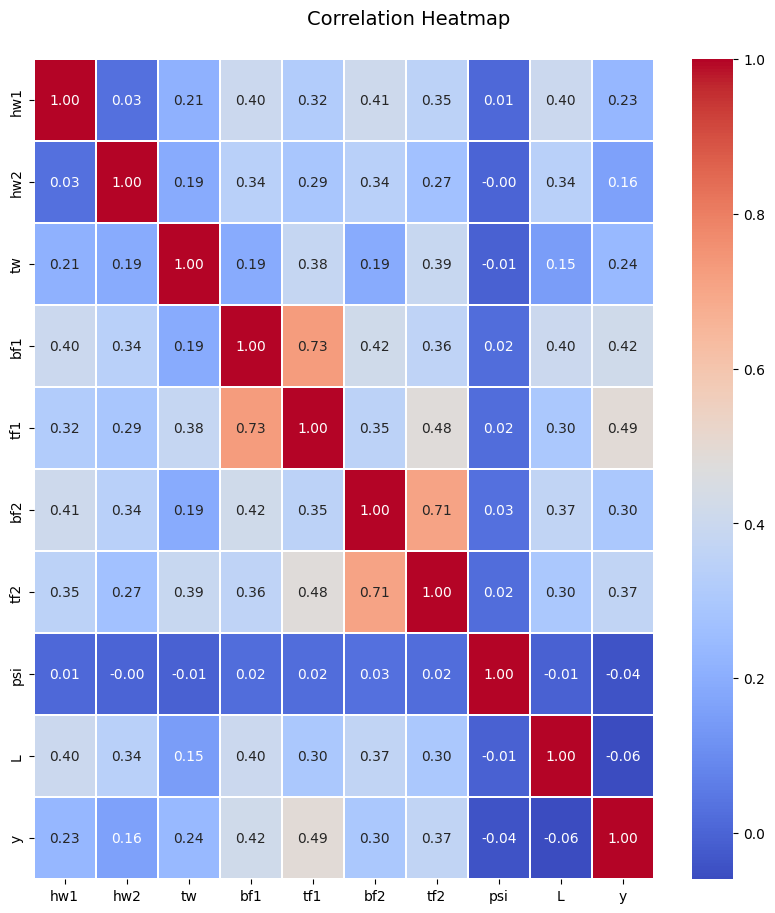

In [5]:
# Correlation matrix heatmap
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 10))
corr = training_set.corr()
hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Correlation Heatmap', fontsize=14)

In [6]:
# X_train = training_set_norm.drop(['y'], axis=1)
# y_train = training_set_norm['y']

# X_test = testing_set_norm.drop(['y'], axis=1)
# y_test = testing_set_norm['y']

# Concatenate training and testing sets
X = pd.concat([training_set.drop(['y'], axis=1), testing_set.drop(['y'], axis=1)])
y = pd.concat([training_set['y'], testing_set['y']])

In [7]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# X_train = X[:training_set_norm.shape[0]]
# X_test = X[training_set_norm.shape[0]:]
# y_train = y[:training_set_norm.shape[0]]
# y_test = y[training_set_norm.shape[0]:]

(55260, 9)
(13815, 9)
(55260,)
(13815,)


In [8]:
# Normalize the labels data using log10 transformation
y_train_max = np.max(np.log10(10*y_train))
y_train = np.log10(10*y_train) / y_train_max
y_test = np.log10(10*y_test) / y_train_max

In [9]:
# Use the powertransformer to transform features
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

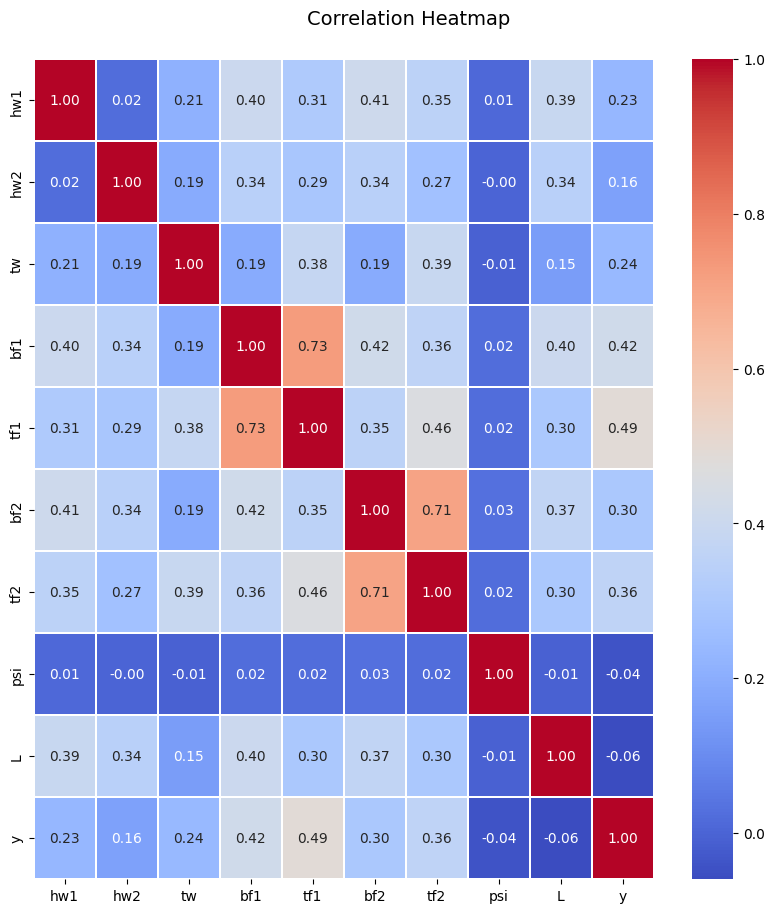

In [10]:
# Correlation matrix heatmap
import seaborn as sns

data = pd.DataFrame(X)
data.columns = ['hw1', 'hw2', 'tw', 'bf1', 'tf1', 'bf2', 'tf2', 'psi', 'L']
data = data.assign(y=y.values)
f, ax = plt.subplots(figsize=(10, 10))
corr = data.corr()
hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Correlation Heatmap', fontsize=14)


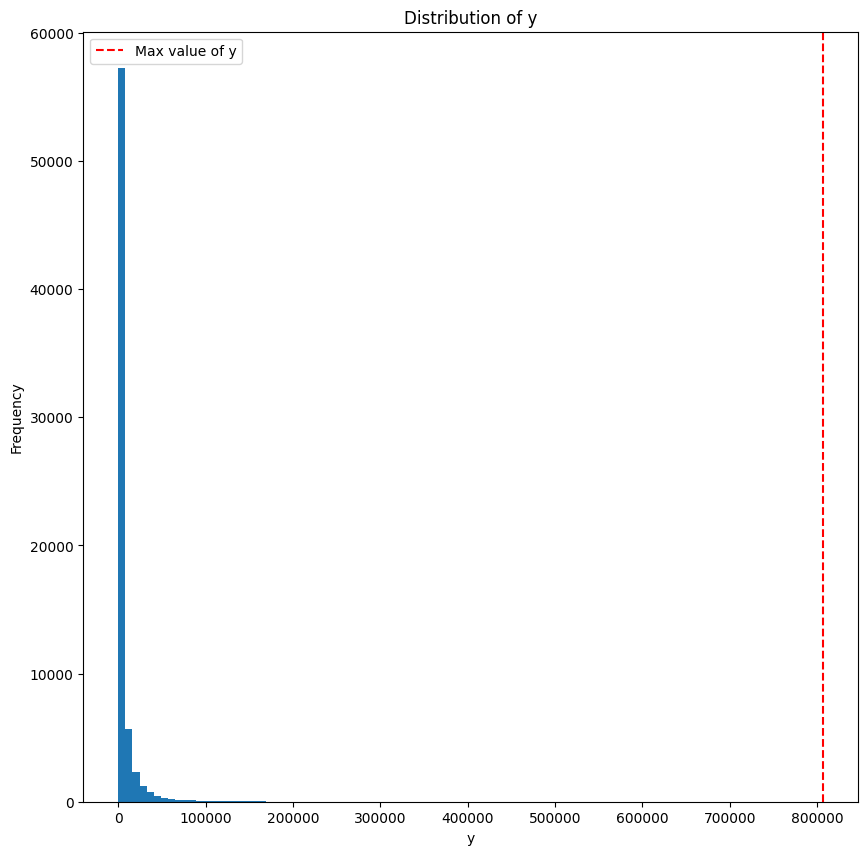

In [11]:
# Plot the distribution of Y
plt.figure(figsize=(10, 10))
plt.hist(y, bins=100)
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('Distribution of y')
# The plot sould present the max value of y
plt.axvline(x=np.max(y), color='r', linestyle='--')
# Legend
plt.legend(['Max value of y'])
plt.show()


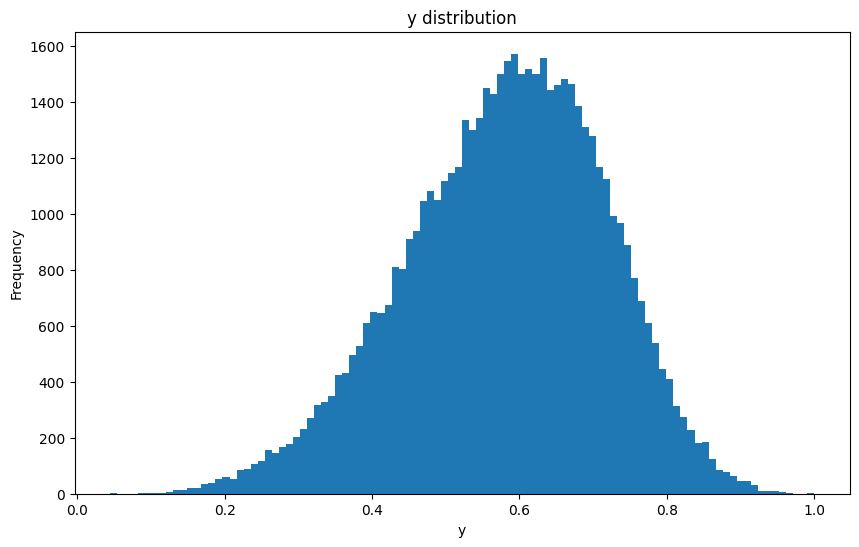

Mean:  0.5802668004704477
Median:  0.5898660576357833
Mode:  ModeResult(mode=0.1804224928116937, count=2)


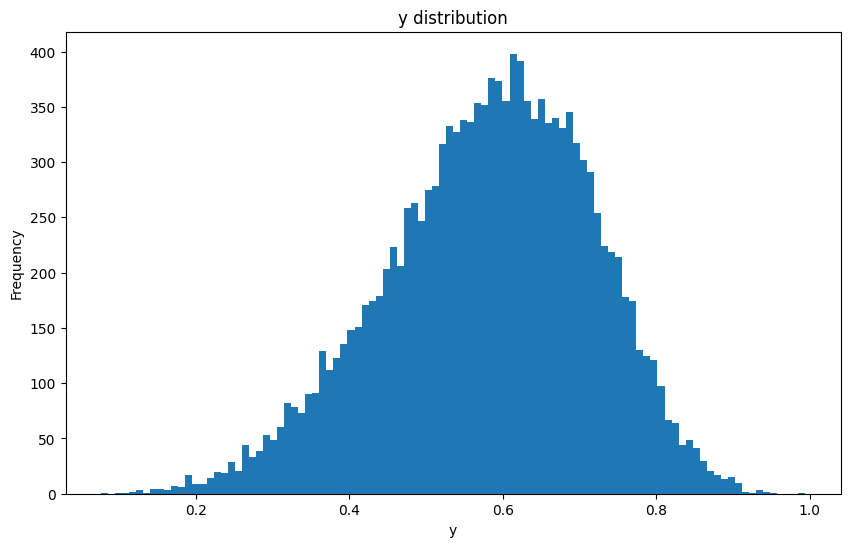

In [12]:
from scipy import stats

# Plot the data distribution for the labels
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=100)
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('y distribution')
plt.show()

# Print the mean, median and mode
print('Mean: ', np.mean(y_train))
print('Median: ', np.median(y_train))
mode = stats.mode(y_train)
print('Mode: ', mode)

# Plot the data distribution for the labels
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=100)
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('y distribution')
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined
# Your training and testing sets (X_train, X_test, y_train, y_test)

# Polynomial transformation of degree x
poly_reg = PolynomialFeatures(degree=6)

# Transforming the training data
X_poly = poly_reg.fit_transform(X_train)

# Training the model
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

# Transforming the test data (not fitting)
X_test_poly = poly_reg.transform(X_test)

# Predicting the Test set results
y_pred = pol_reg.predict(X_test_poly)

# Evaluating the model
# The mean squared error
print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred))
# The mean absolute error
print("Mean absolute error: %.8f" % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score (Train): %.8f' % r2_score(y_train, pol_reg.predict(X_poly)))
print('Variance score (Test): %.8f' % r2_score(y_test, y_pred))

# Plot outputs
figs, axs = plt.subplots(1, 2, figsize=(15, 5))

# Training set
axs[0].scatter(y_train, pol_reg.predict(X_poly), color='black')
axs[0].plot(y_train, y_train, color='blue', linewidth=3)
axs[0].set_xlabel('Measured')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Polynomial regression model (Training set)')
# Creating empty lines for legend entries
lin1, = axs[0].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_train, pol_reg.predict(X_poly)))
lin2, = axs[0].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_train, pol_reg.predict(X_poly)))
lin3, = axs[0].plot([], [], 'none', label="R2: %.8f" % r2_score(y_train, pol_reg.predict(X_poly)))
axs[0].legend(handles=[lin1, lin2, lin3])

# Testing set
axs[1].scatter(y_test, y_pred, color='black')
axs[1].plot(y_test, y_test, color='blue', linewidth=3)
axs[1].set_xlabel('Measured')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Polynomial regression model (Testing set)')
# Creating empty lines for legend entries
lin1, = axs[1].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_test, y_pred))
lin2, = axs[1].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_test, y_pred))
lin3, = axs[1].plot([], [], 'none', label="R2: %.8f" % r2_score(y_test, y_pred))
axs[1].legend(handles=[lin1, lin2, lin3])

plt.show()

In [ ]:
# Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Training the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lin_reg.predict(X_test)

# Evaluating the model
# The mean squared error
print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred))
# The mean absolute error
print("Mean absolute error: %.8f" % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score (Train): %.8f' % r2_score(y_train, lin_reg.predict(X_train)))
print('Variance score (Test): %.8f' % r2_score(y_test, y_pred))

# Plot outputs
figs, axs = plt.subplots(1, 2, figsize=(15, 5))

# Training set
axs[0].scatter(y_train, lin_reg.predict(X_train), color='black')
axs[0].plot(y_train, y_train, color='blue', linewidth=3)
axs[0].set_xlabel('Measured')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Linear regression model (Training set)')
# Creating empty lines for legend entries
lin1, = axs[0].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_train, lin_reg.predict(X_train)))
lin2, = axs[0].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_train, lin_reg.predict(X_train)))
lin3, = axs[0].plot([], [], 'none', label="R2: %.8f" % r2_score(y_train, lin_reg.predict(X_train)))
axs[0].legend(handles=[lin1, lin2, lin3])

# Testing set
axs[1].scatter(y_test, y_pred, color='black')
axs[1].plot(y_test, y_test, color='blue', linewidth=3)
axs[1].set_xlabel('Measured')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Linear regression model (Testing set)')
# Creating empty lines for legend entries
lin1, = axs[1].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_test, y_pred))
lin2, = axs[1].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_test, y_pred))
lin3, = axs[1].plot([], [], 'none', label="R2: %.8f" % r2_score(y_test, y_pred))
axs[1].legend(handles=[lin1, lin2, lin3])

plt.show()